In [15]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math
import cmath
from PIL import Image, ImageOps

### Reading Input Grayscale Image

No. of Images =  8


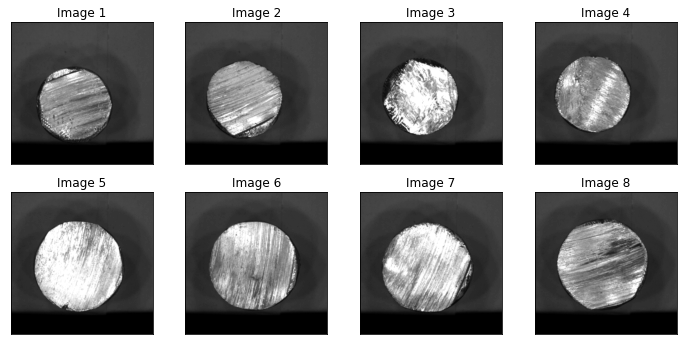

In [16]:
#Reading input image
#Input list of images from path

images = [Image.open(file) for file in glob.glob("./dataset/*.BMP")]
print("No. of Images = ", len(images))

gray_images=[]
rgb_images=[]
new_width=500
new_height=500

plt.rcParams["figure.figsize"]=12,12
for i in range(len(images)):
    im=images[i]
    width, height = im.size  # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    im2=np.array(im)
    rgb_images.append(im2)
    im=ImageOps.grayscale(im)
    im=np.array(im)
    gray_images.append(im)
    
for i in range(len(gray_images)):    
    plt.subplot(4,4,i+1),plt.imshow(gray_images[i],'gray')
    plt.title("Image "+str(i+1))
    plt.xticks([]),plt.yticks([])
plt.show()

In [17]:
# plt.rcParams["figure.figsize"]=10,10
# ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
# ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
# ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
# ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
# titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
# thresh_images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
# for i in range(6):
#     plt.subplot(2,3,i+1),plt.imshow(thresh_images[i],'gray',vmin=0,vmax=255)
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
# plt.show()

# binary_images=[]
# for i in range(len(gray_images)):
#     ret,thresh = cv2.threshold(gray_images[i],100,255,cv2.THRESH_BINARY)
#     binary_images.append(thresh)
    
#     plt.subplot(4,4,i+1),plt.imshow(binary_images[i],'gray')
#     plt.title("Smooth Image "+str(i+1))
#     plt.xticks([]),plt.yticks([])

### Gaussian Filter

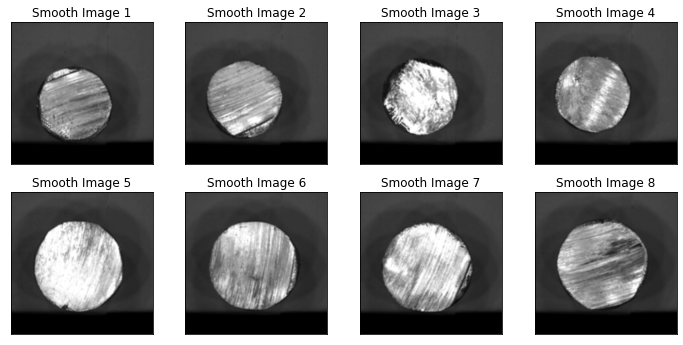

In [18]:
kernel = np.ones((5,5),np.float32)/25
smooth_images=[]
for i in range(len(gray_images)):
    smooth_images.append(cv2.filter2D(gray_images[i],-1,kernel))
    
    plt.subplot(4,4,i+1),plt.imshow(smooth_images[i],'gray')
    plt.title("Smooth Image "+str(i+1))
    plt.xticks([]),plt.yticks([])


### Binary Thresholding

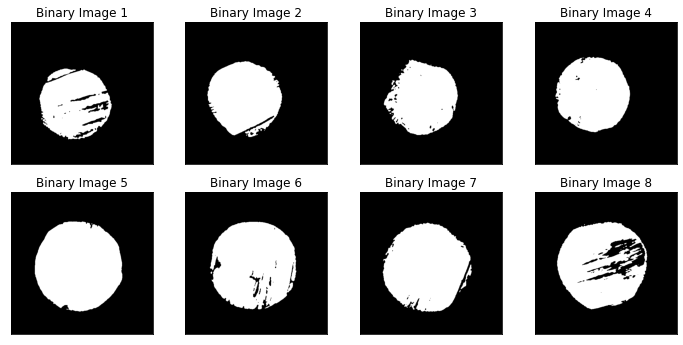

In [19]:
binary_images=[]
for i in range(8):
    ret,thresh = cv2.threshold(smooth_images[i],100,255,cv2.THRESH_BINARY)
    binary_images.append(thresh)
    
    plt.subplot(4,4,i+1),plt.imshow(binary_images[i],'gray')
    plt.title("Binary Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

### Histogram Equalization


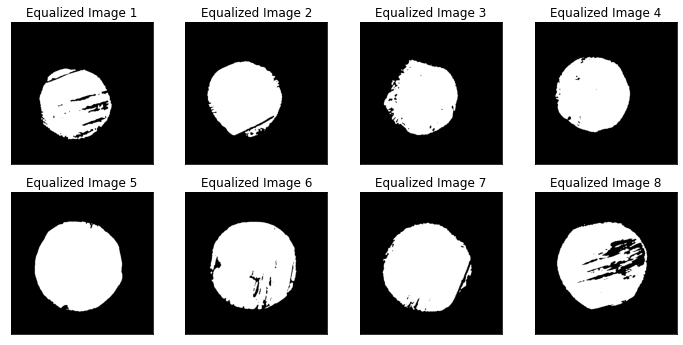

In [20]:
equal_images=[]
for i in range(8):
    equal_images.append(cv2.equalizeHist(binary_images[i]))
    
    plt.subplot(4,4,i+1),plt.imshow(equal_images[i],'gray')
    plt.title("Equalized Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

### Opening

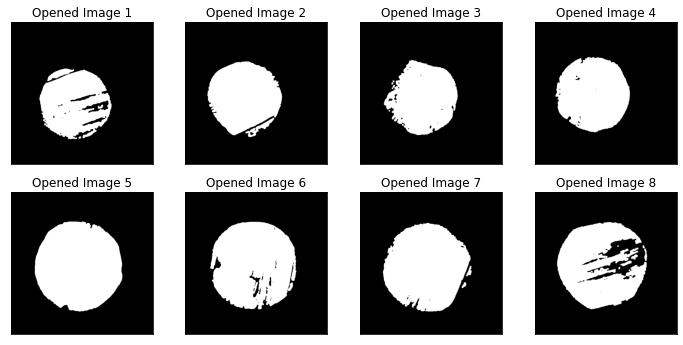

In [21]:
kernel = np.ones((5,5),np.uint8)
open_images=[]
for i in range(len(equal_images)):
    open_images.append(cv2.morphologyEx(equal_images[i], cv2.MORPH_OPEN, kernel))
    
    plt.subplot(4,4,i+1),plt.imshow(open_images[i],'gray')
    plt.title("Opened Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

### Closing

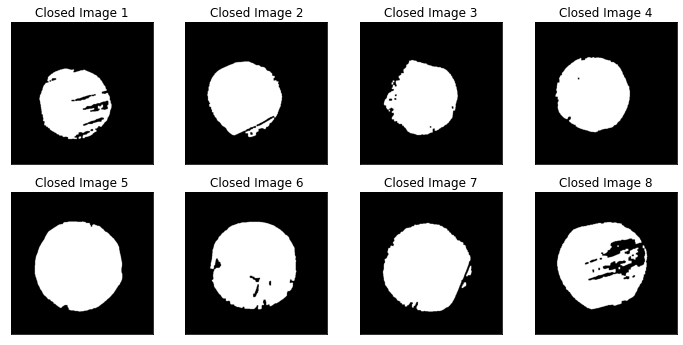

In [22]:
kernel = np.ones((5,5),np.uint8)
closed_images=[]
for i in range(len(equal_images)):
    closed_images.append(cv2.morphologyEx(open_images[i], cv2.MORPH_CLOSE, kernel))
    
    plt.subplot(4,4,i+1),plt.imshow(closed_images[i],'gray')
    plt.title("Closed Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

### Otsu Thresholding

In [23]:
# binary_images=[]
# for i in range(len(closed_images)):
#     ret,thresh = cv2.threshold(closed_images[i],100,255,cv2.THRESH_BINARY)
#     binary_images.append(thresh)
    
#     plt.subplot(4,4,i+1),plt.imshow(binary_images[i],'gray')
#     plt.title("Binary Image "+str(i+1))
#     plt.xticks([]),plt.yticks([])

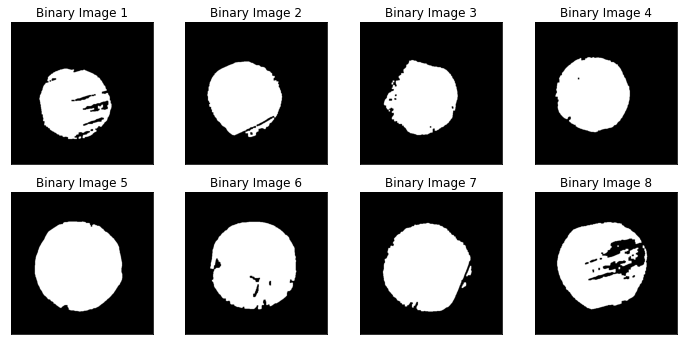

In [24]:
otsu_images=[]
for i in range(len(closed_images)):
    ret,thresh = cv2.threshold(closed_images[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    otsu_images.append(thresh)
    
    plt.subplot(4,4,i+1),plt.imshow(otsu_images[i],'gray')
    plt.title("Binary Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

### Edge Detection Using Canny Algo

In [25]:
# print(np.shape(binary_images))
# binary_images=np.array(binary_images)
# binary_images=binary_images[0:8, 80:400, 80:420]
# print(np.shape(binary_images))
# for i in range(len(binary_images)):
#     plt.subplot(4,4,i+1),plt.imshow(binary_images[i],'gray')
#     plt.title("Edges Image "+str(i+1))
#     plt.xticks([]),plt.yticks([])

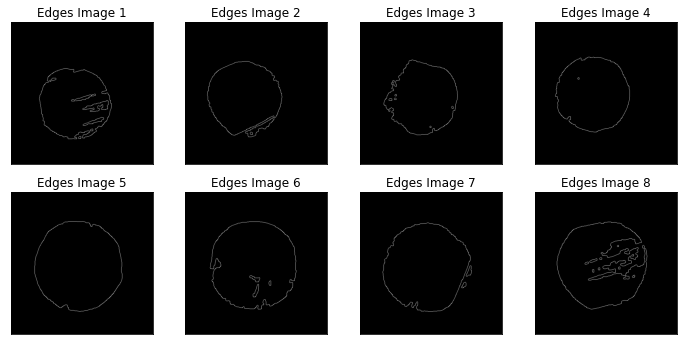

In [26]:
edge_images=[]
for i in range(len(otsu_images)):
    edge_images.append(cv2.Canny(otsu_images[i],0,255))
    
    plt.subplot(4,4,i+1),plt.imshow(edge_images[i],'gray')
    plt.title("Edges Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

#np.shape(edge_images)
#len(otsu_images)

In [27]:
#plt.imshow(edge_images[0], 'gray')

In [28]:
# kernel = np.ones((5,5),np.uint8)
# open_images_1=[]
# for i in range(8):
#     open_images_1.append(cv2.morphologyEx(edge_images[i], cv2.MORPH_OPEN, kernel))
    
#     plt.subplot(4,4,i+1),plt.imshow(open_images[i],'gray')
#     plt.title("Opened Edge Image "+str(i+1))
#     plt.xticks([]),plt.yticks([])

## References

Gonzalez, Rafael C. and Woods, Richard E.. Digital image processing. Upper Saddle River, N.J.: Prentice Hall, 2008

W. Sriratana, N. Narknam, R. Apichitanon and N. Tammarugwattana, "Application of Webcam for Inspection of Rice Grain Quality by Using Image Processing Technique," 2020 20th International Conference on Control, Automation and Systems (ICCAS), 2020, pp. 1134-1139, doi: 10.23919/ICCAS50221.2020.9268316.

https://learnopencv.com/contour-detection-using-opencv-python-c/

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html  

https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html  

https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html  
